In [1]:
# importing the libraries

import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as stl
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the data file

data = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [5]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# drop the unnecessory values

data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
# checking for null values

data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# remove the null values

data.dropna(inplace=True)

In [10]:
data['Amount'] = data['Amount'].astype('int')
data['Amount'].dtypes

dtype('int32')

# Exploratory Data Analysis

***Gender***

In [11]:
stl.use('ggplot')

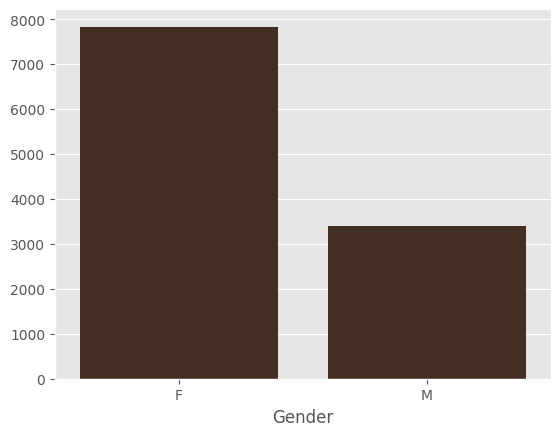

In [12]:
sns.countplot(data=data, x='Gender', color="#482E1D")
plt.ylabel(None)
plt.show()

*The above graph shows that there are more Female customers*

**Age**

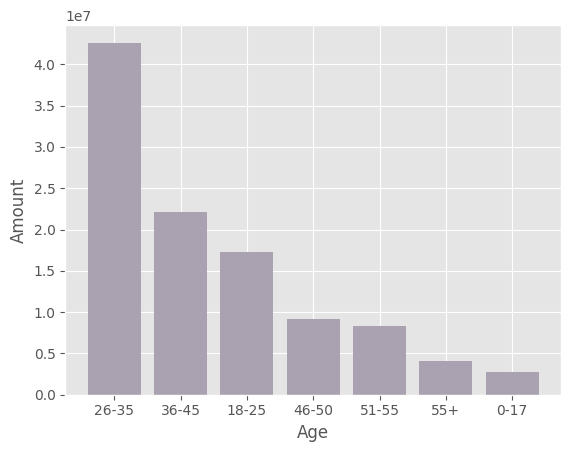

In [13]:
# Amount vs Age group

grp1 = data.groupby('Age Group')['Amount'].sum().sort_values(ascending=False)

plt.bar(grp1.index, grp1.values, color='#AAA2b1')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

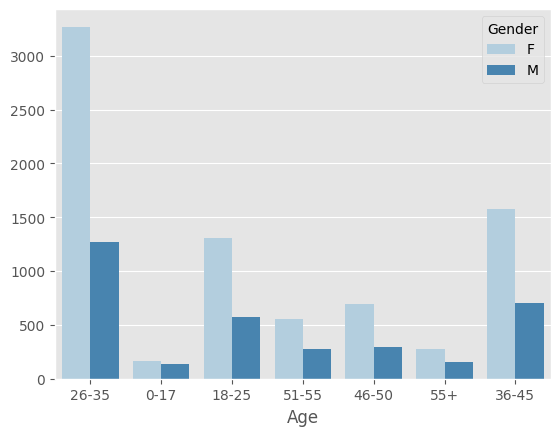

In [14]:
# Count of age group on the basis of Gender

sns.countplot(data=data, x='Age Group', hue='Gender', palette='Blues')
plt.xlabel('Age')
plt.ylabel(None)
plt.show()

*The above graph shows that the most buyers are the Females of 26-35 years of age*

***State***

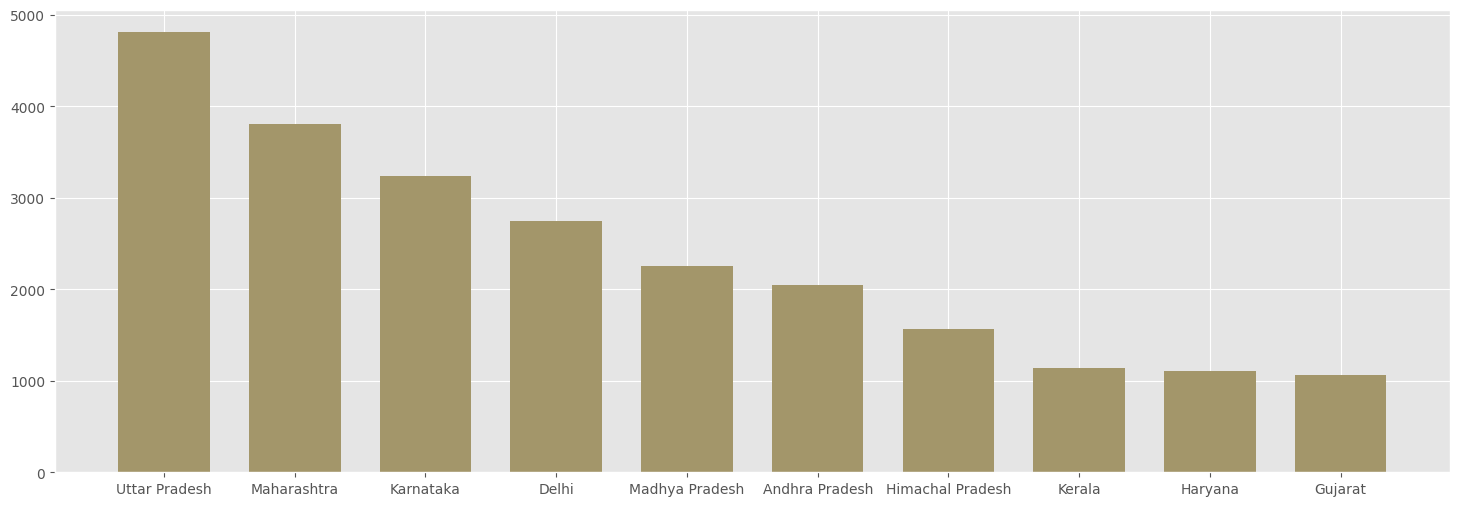

In [15]:
# total number of orders from the top 10 states

top_states = data.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize = (18,6))
plt.bar(top_states.index, top_states.values, width=0.7, color='#a3966a')
plt.show()

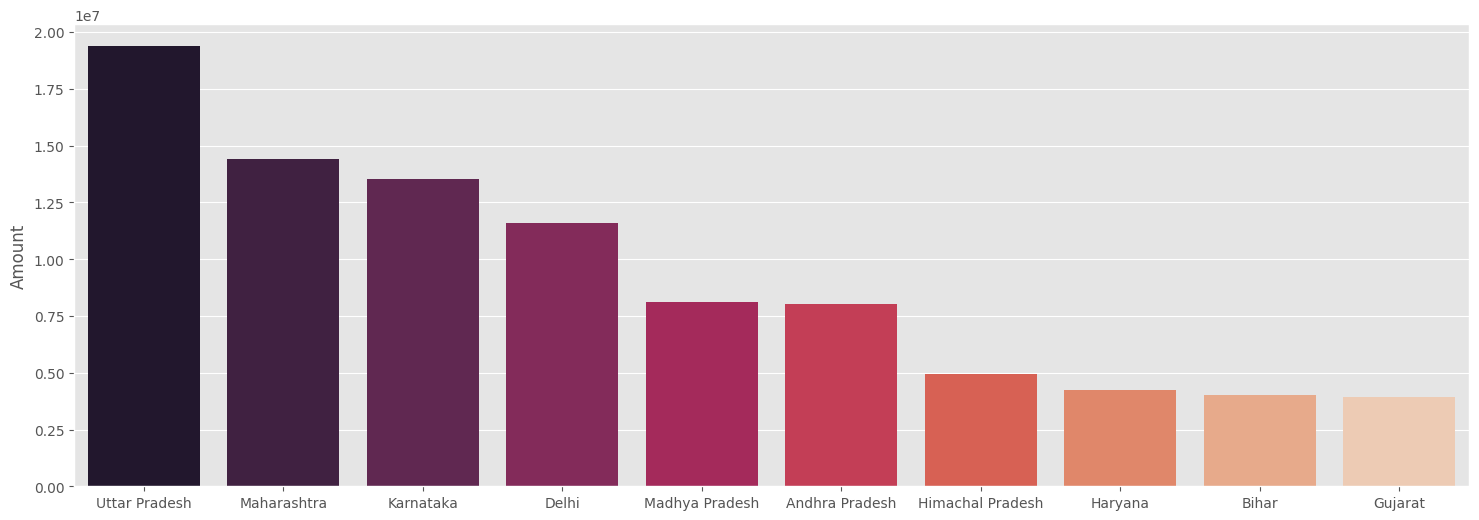

In [16]:
# total amount from the top 10 States

top_amount = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

plt.figure(figsize= (18,6))
sns.barplot(data=top_amount, x='State', y='Amount', palette='rocket')
plt.xlabel(None)
plt.show()

*The above graph shows that the most orders and sales are from Uttar Pradesh, Maharashtra and Karnataka*

***Marital Status***

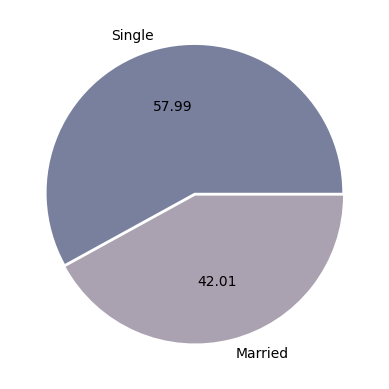

In [17]:
# Married vs Single customers

married_data = data['Marital_Status'].value_counts(normalize=True)

label=['Single', 'Married']
plt.pie(married_data, labels=label, explode=[0.01, 0.01], autopct='%.2f', colors = ['#78809D', '#AAA2b1'])
plt.show()

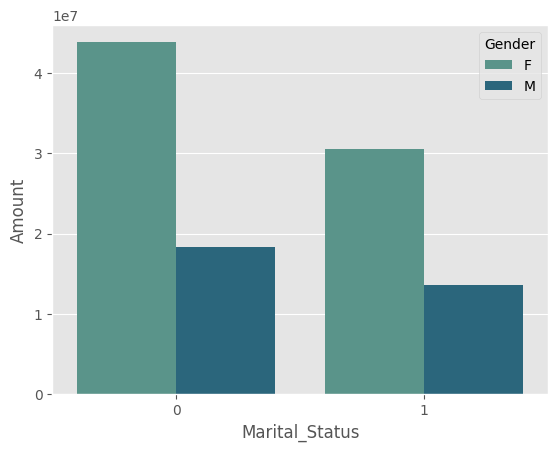

In [18]:
# Amount/sales done by Married vs Single customers

status_amt = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum()
sns.barplot(data=status_amt, x='Marital_Status', y='Amount',hue='Gender', palette='crest')

plt.show()

*The above graph shows that the Female customers from both status(Married and Single) are the biggest buyers*

***Products***

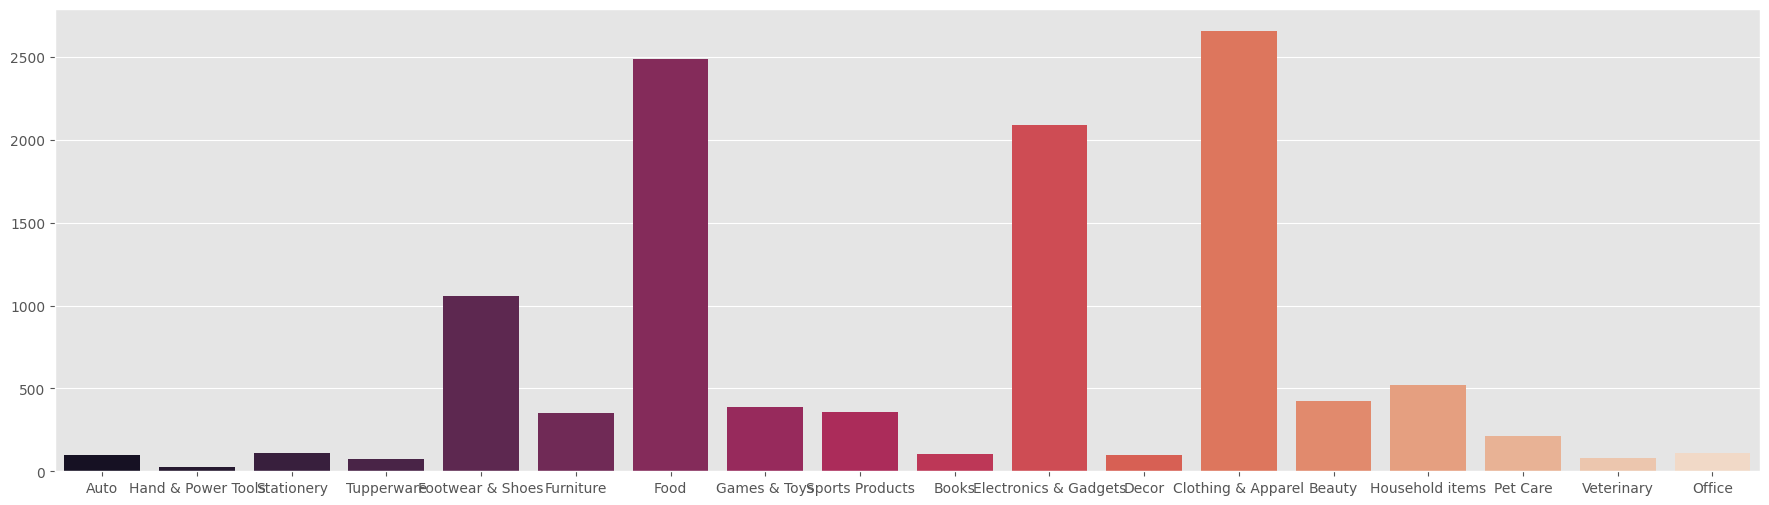

In [19]:
# Sold products

plt.figure(figsize=(22,6))
sns.countplot(data=data, x='Product_Category', palette='rocket')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

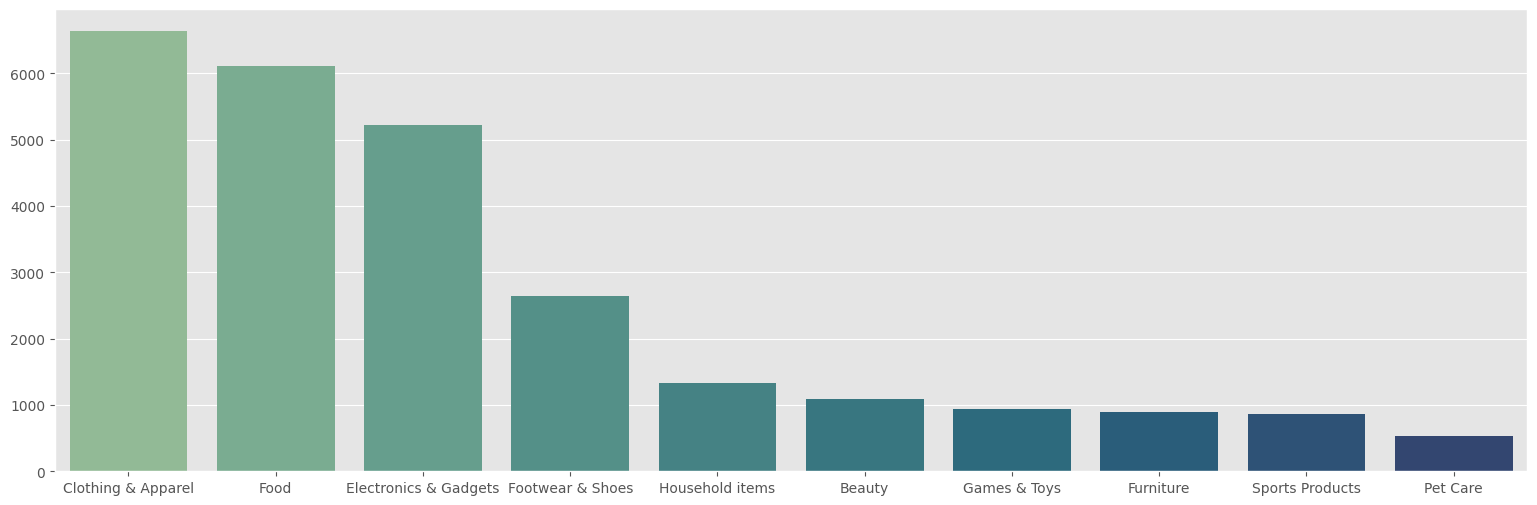

In [20]:
# most sold products (top 10)

plt.figure(figsize=(19, 6))
sold_pro = data.groupby('Product_Category', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data=sold_pro, x='Product_Category', y='Orders', palette='crest')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

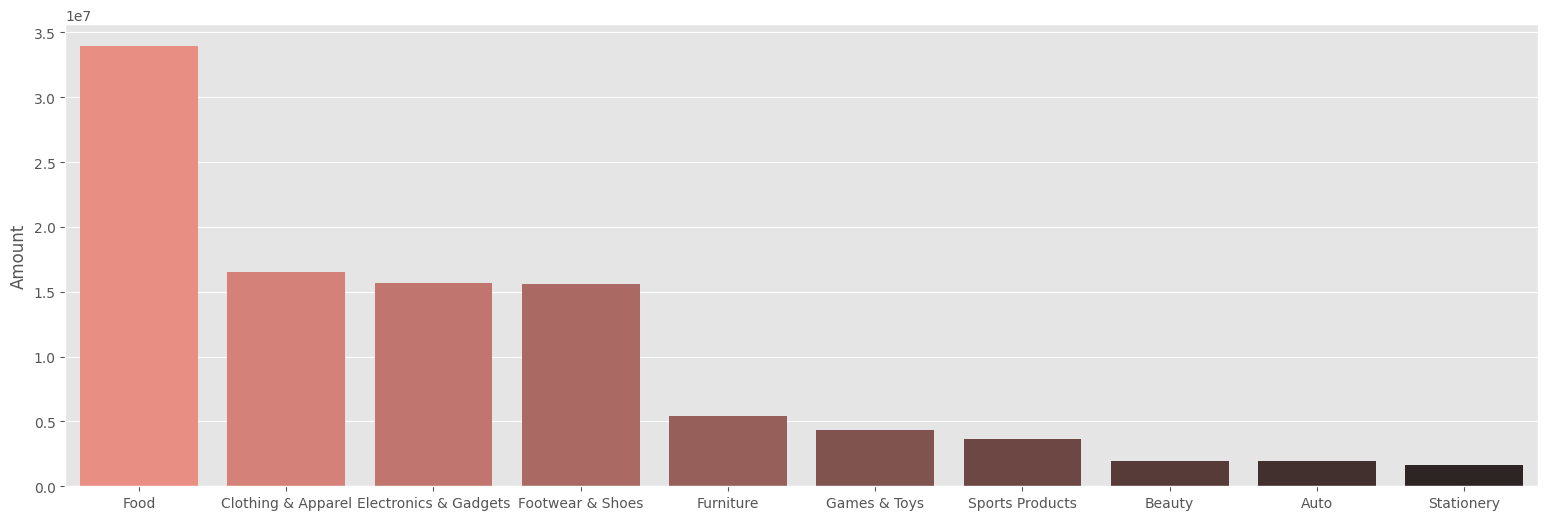

In [21]:
# top 10 products on the basis of amount/sales

plt.figure(figsize=(19, 6))
sold_pro = data.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data=sold_pro, x='Product_Category', y='Amount', palette='dark:salmon_r')
plt.xlabel(None)
plt.ylabel('Amount')
plt.show()

*The above graph shows that the most sold produts are Clothings, Food and Electronic gadgets*

***Occupation***

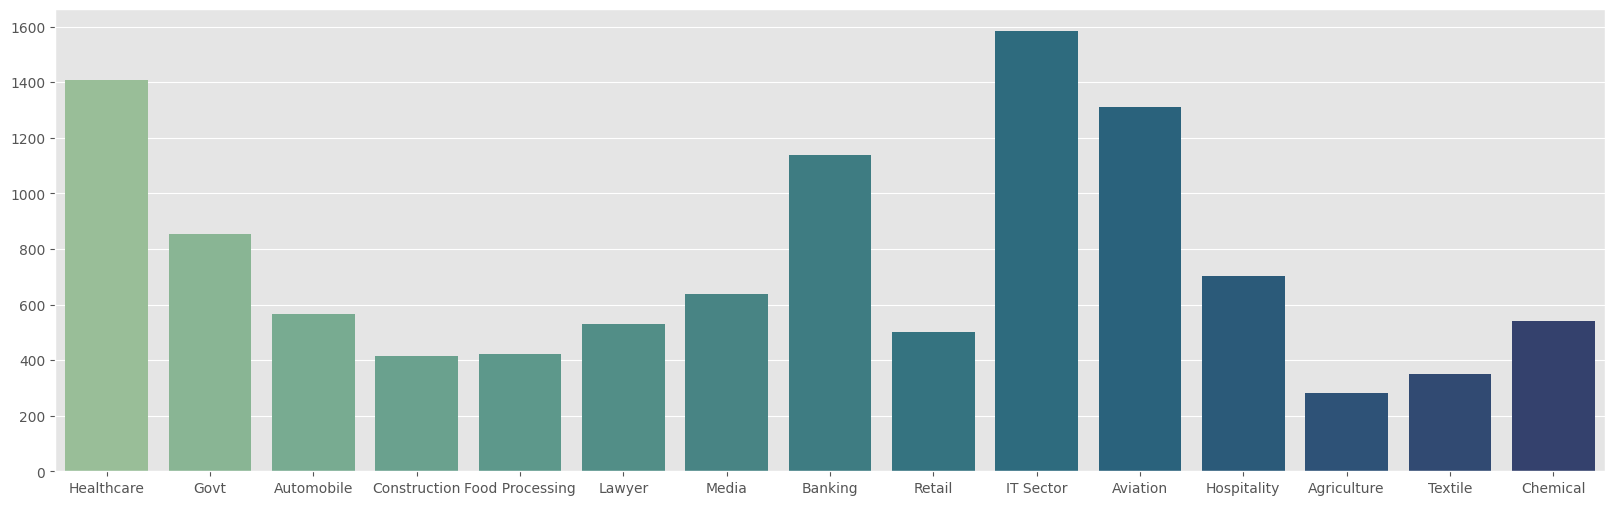

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(data=data, x='Occupation', palette='crest')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

*The above graph shows that most of the customers are from IT, Healthcare and Aviation sector*

# Conclusion

***1)Females between the age of 26 and 35 are the most buyers.***

***2) Uttar Pradesh, maharashtra and Karnataka are the States with the most number of sales***

***3) Products like Clothing, Food and Electronic gadgets are sold much more than the other products***